In [1]:
%pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
dataset = pd.read_csv('../Datasets/diabetes_prediction_dataset.csv')
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
corr = dataset.select_dtypes(include='number').corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [9]:
plt.figure(figsize=(20,20)) 
import seaborn as sns

<Figure size 2000x2000 with 0 Axes>

<Axes: >

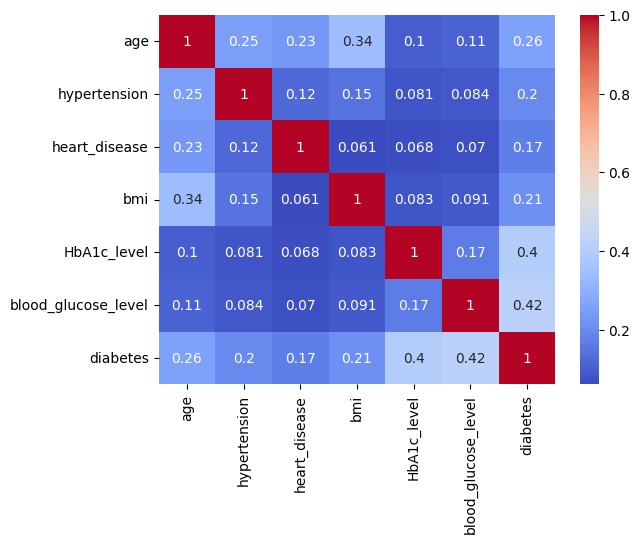

In [10]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [12]:
dataset['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
dataset['smoking_history'] = dataset['smoking_history'].replace({
    'current': 'smokes',
    'ever': 'smokes',
    'not current': 'Former smoker',
    'former': 'Former smoker',
    'never': 'Never smoked',
    'No Info': 'Never smoked'
})

In [14]:
dataset.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
dataset['age']

0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64

In [16]:
# Create new columns based on age ranges
dataset["AgeCategory_0-9"] = (dataset["age"] >= 0) & (dataset["age"] <= 9)
dataset["AgeCategory_10-19"] = (dataset["age"] >= 10) & (dataset["age"] <= 19)
dataset["AgeCategory_20-24"] = (dataset["age"] >= 20) & (dataset["age"] <= 24)
dataset["AgeCategory_25-59"] = (dataset["age"] >= 25) & (dataset["age"] <= 59)
dataset["AgeCategory_60 or older"] = (dataset["age"] >= 60)

# Remove the original Age column
dataset.drop("age", axis=1, inplace=True)

In [17]:
dataset.columns

Index(['gender', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'AgeCategory_0-9',
       'AgeCategory_10-19', 'AgeCategory_20-24', 'AgeCategory_25-59',
       'AgeCategory_60 or older'],
      dtype='object')

In [18]:
dataset.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Female,0,1,Never smoked,25.19,6.6,140,0,False,False,False,False,True
1,Female,0,0,Never smoked,27.32,6.6,80,0,False,False,False,True,False
2,Male,0,0,Never smoked,27.32,5.7,158,0,False,False,False,True,False
3,Female,0,0,smokes,23.45,5.0,155,0,False,False,False,True,False
4,Male,1,1,smokes,20.14,4.8,155,0,False,False,False,False,True


In [19]:
dataset.replace({True:1, False:0}, inplace=True)

/var/folders/1h/gvg1d3j93k54jclq_30b7vw40000gn/T/ipykernel_8479/2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [20]:
dataset.head()

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,Female,0,1,Never smoked,25.19,6.6,140,0,0,0,0,0,1
1,Female,0,0,Never smoked,27.32,6.6,80,0,0,0,0,1,0
2,Male,0,0,Never smoked,27.32,5.7,158,0,0,0,0,1,0
3,Female,0,0,smokes,23.45,5.0,155,0,0,0,0,1,0
4,Male,1,1,smokes,20.14,4.8,155,0,0,0,0,0,1


In [21]:
dataset['smoking_history'].unique()

array(['Never smoked', 'smokes', 'Former smoker'], dtype=object)

In [22]:
# Create new columns based on SmokerStatus
dataset["Never smoked"] = (dataset["smoking_history"] == 'Never smoked')
dataset["smokes"] = (dataset["smoking_history"] == 'smokes')
dataset["Former smoker"] = (dataset["smoking_history"] == 'Former smoker')

# Remove the original SmokerStatus column
dataset.drop("smoking_history", axis=1, inplace=True)

In [23]:
dataset.replace({True:1, False:0}, inplace=True)

/var/folders/1h/gvg1d3j93k54jclq_30b7vw40000gn/T/ipykernel_8479/2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [24]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,Female,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,Female,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,Male,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,Female,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,Male,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [25]:
dataset.dtypes

gender                      object
hypertension                 int64
heart_disease                int64
bmi                        float64
HbA1c_level                float64
blood_glucose_level          int64
diabetes                     int64
AgeCategory_0-9              int64
AgeCategory_10-19            int64
AgeCategory_20-24            int64
AgeCategory_25-59            int64
AgeCategory_60 or older      int64
Never smoked                 int64
smokes                       int64
Former smoker                int64
dtype: object

In [26]:
dataset['gender'] = (dataset['gender']=='Male')

In [27]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,False,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,False,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,True,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,False,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,True,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [28]:
dataset.replace({True:1, False:0}, inplace=True)

/var/folders/1h/gvg1d3j93k54jclq_30b7vw40000gn/T/ipykernel_8479/2795904199.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.replace({True:1, False:0}, inplace=True)


In [29]:
dataset.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,0,0,1,25.19,6.6,140,0,0,0,0,0,1,1,0,0
1,0,0,0,27.32,6.6,80,0,0,0,0,1,0,1,0,0
2,1,0,0,27.32,5.7,158,0,0,0,0,1,0,1,0,0
3,0,0,0,23.45,5.0,155,0,0,0,0,1,0,0,1,0
4,1,1,1,20.14,4.8,155,0,0,0,0,0,1,0,1,0


In [30]:
len(dataset)

100000

In [31]:
X = dataset.drop('diabetes', axis=1)
y = dataset['diabetes']

In [32]:
X.head()

,gender,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older,Never smoked,smokes,Former smoker
0,0,0,1,25.19,6.6,140,0,0,0,0,1,1,0,0
1,0,0,0,27.32,6.6,80,0,0,0,1,0,1,0,0
2,1,0,0,27.32,5.7,158,0,0,0,1,0,1,0,0
3,0,0,0,23.45,5.0,155,0,0,0,1,0,0,1,0
4,1,1,1,20.14,4.8,155,0,0,0,0,1,0,1,0


In [33]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [34]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [36]:
X.shape

(100000, 14)

In [37]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [38]:
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the ANN architecture
def create_ann():
    model = keras.models.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(14,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier wrapper for the ANN
ann_classifier = KerasClassifier(
    model=create_ann,
    epochs=50,  # Keeping original 50 epochs
    batch_size=32,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )],
    verbose=1
)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss'
)

# First train individual models
print("Training ANN...")
ann_classifier.fit(X_train, y_train)

print("\nTraining XGBoost...")
xgb_classifier.fit(X_train, y_train)

# Create and train voting classifier with both hard and soft voting
voting_clf_soft = VotingClassifier(
    estimators=[('ann', ann_classifier), ('xgb', xgb_classifier)],
    voting='soft'
)

voting_clf_hard = VotingClassifier(
    estimators=[('ann', ann_classifier), ('xgb', xgb_classifier)],
    voting='hard'
)

print("\nTraining Voting Classifier (Soft)...")
voting_clf_soft.fit(X_train, y_train)

print("\nTraining Voting Classifier (Hard)...")
voting_clf_hard.fit(X_train, y_train)

# Get predictions from all models
y_pred_ann = ann_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_voting_soft = voting_clf_soft.predict(X_test)
y_pred_voting_hard = voting_clf_hard.predict(X_test)

# Calculate accuracies
print("\nModel Accuracies:")
print("ANN Accuracy:", accuracy_score(y_test, y_pred_ann))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Voting Classifier (Soft) Accuracy:", accuracy_score(y_test, y_pred_voting_soft))
print("Voting Classifier (Hard) Accuracy:", accuracy_score(y_test, y_pred_voting_hard))

Training ANN...
Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 513us/step - accuracy: 0.8996 - loss: 0.5474 - val_accuracy: 0.9329 - val_loss: 0.1965
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9291 - loss: 0.2015 - val_accuracy: 0.9449 - val_loss: 0.1434
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step - accuracy: 0.9442 - loss: 0.1561 - val_accuracy: 0.9563 - val_loss: 0.1229
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9502 - loss: 0.1404 - val_accuracy: 0.9453 - val_loss: 0.1581
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9518 - loss: 0.1344 - val_accuracy: 0.9548 - val_loss: 0.1249
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.9539 - loss: 0.1298 - val_accuracy: 0.9364 - val_loss: 0.1546
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.9546 - loss: 0.1264 - val_accuracy: 0.9581 - val_loss: 0.1157
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 446us/step - accuracy: 0.9547 - loss: 0.12

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:44:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training Voting Classifier (Soft)...
Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.9054 - loss: 0.3980 - val_accuracy: 0.9348 - val_loss: 0.1920
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.9340 - loss: 0.1936 - val_accuracy: 0.9459 - val_loss: 0.1525
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.9423 - loss: 0.1600 - val_accuracy: 0.9524 - val_loss: 0.1303
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.9518 - loss: 0.1375 - val_accuracy: 0.9576 - val_loss: 0.1180
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.9536 - loss: 0.1312 - val_accuracy: 0.9589 - val_loss: 0.1140
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.9553 - loss: 0.1253 - val_accuracy: 0.9516 - val_loss: 0.1266
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.9557 - loss: 0.1250 - val_accuracy: 0.9576 - val_loss: 0.1235
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.9593 - loss: 0.11

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:45:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Epoch 1/50


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.9004 - loss: 0.5543 - val_accuracy: 0.9358 - val_loss: 0.1866
Epoch 2/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9323 - loss: 0.1955 - val_accuracy: 0.9519 - val_loss: 0.1456
Epoch 3/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.9454 - loss: 0.1504 - val_accuracy: 0.9475 - val_loss: 0.1392
Epoch 4/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.9495 - loss: 0.1419 - val_accuracy: 0.9565 - val_loss: 0.1196
Epoch 5/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.9526 - loss: 0.1353 - val_accuracy: 0.9532 - val_loss: 0.1278
Epoch 6/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.9526 - loss: 0.1344 - val_accuracy: 0.9546 - val_loss: 0.1390
Epoch 7/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.9563 - loss: 0.1254 - val_accuracy: 0.9565 - val_loss: 0.1244
Epoch 8/50
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.9567 - loss: 0.12

/opt/homebrew/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:45:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step

Model Accuracies:
ANN Accuracy: 0.96585
XGBoost Accuracy: 0.97085
Voting Classifier (Soft) Accuracy: 0.9715
Voting Classifier (Hard) Accuracy: 0.9699


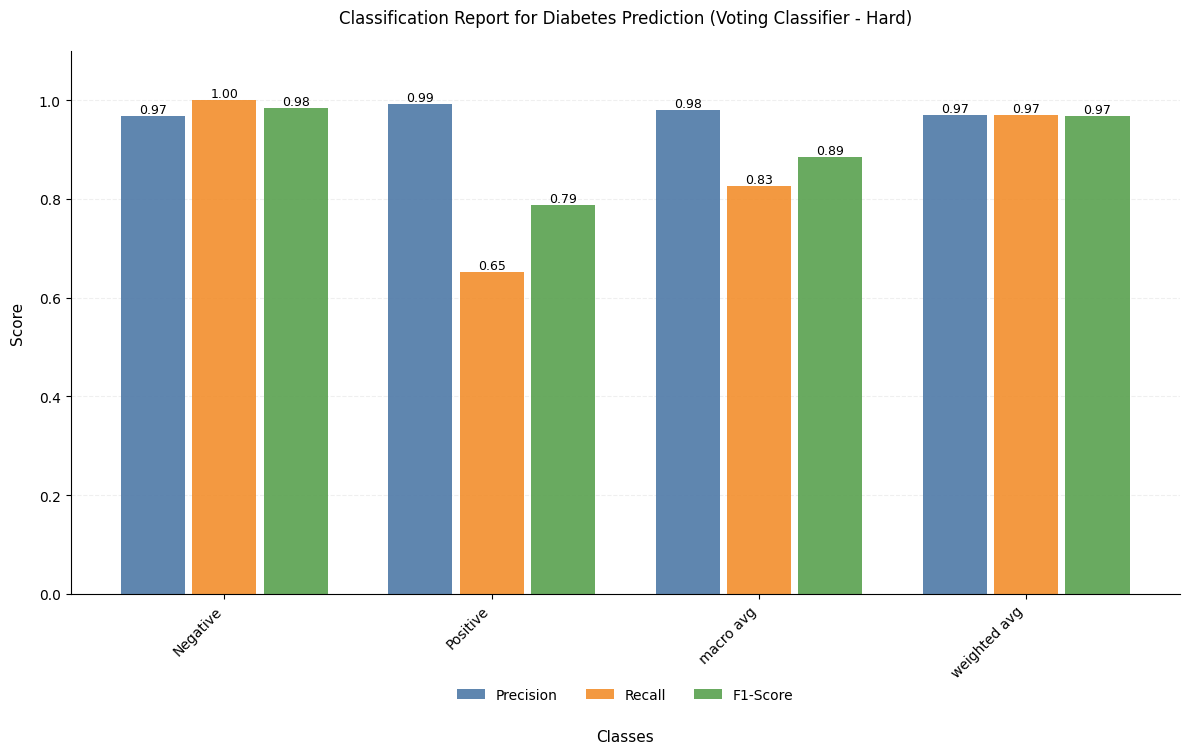

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

def plot_classification_metrics(Y_test, y_pred):
    # Get classification report
    report = classification_report(Y_test, y_pred, output_dict=True)
    
    # Convert to dataframe and prepare data
    df = pd.DataFrame(report).transpose()
    df = df.drop(['support', 'accuracy'], errors='ignore')
    
    # Rename the classes
    df.rename(index={'0': 'Negative', '1': 'Positive'}, inplace=True)
    
    # Set style
    plt.style.use('default')
    
    # Create figure with increased height
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Set position of bars
    x = np.arange(len(df.index))
    total_width = 0.8
    width = total_width / 3
    
    # Professional color scheme
    colors = ['#4e79a7', '#f28e2c', '#59a14f']  # Blue, Orange, Green
    
    # Create bars with correct labels
    bars1 = ax.bar(x - width, df['precision'], width * 0.9, 
                  label='Precision', color=colors[0], alpha=0.9)
    bars2 = ax.bar(x, df['recall'], width * 0.9, 
                  label='Recall', color=colors[1], alpha=0.9)
    bars3 = ax.bar(x + width, df['f1-score'], width * 0.9, 
                  label='F1-Score', color=colors[2], alpha=0.9)
    
    # Customize the plot
    ax.set_xlabel('Classes', fontsize=11, labelpad=35)
    ax.set_ylabel('Score', fontsize=11, labelpad=10)
    ax.set_title('Classification Report for Diabetes Prediction (Voting Classifier - Hard)', fontsize=12, pad=20)


    
    # Set x-axis ticks with 45-degree rotation and more spacing
    plt.xticks(x, df.index, rotation=45, ha='right')
    
    # Add horizontal grid lines only
    ax.yaxis.grid(True, linestyle='--', alpha=0.2)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add value labels with better positioning
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height,
                   f'{height:.2f}',
                   ha='center', va='bottom', fontsize=9,
                   fontweight='medium')
    
    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)
    
    # Customize legend with more space
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
             ncol=3, frameon=False, fontsize=10)
    
    # Set y-axis limits with some padding
    plt.ylim(0, 1.1)
    
    # Set y-axis ticks
    plt.yticks(np.arange(0, 1.1, 0.2))
    
    # Adjust layout with significantly more bottom padding
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)
    
    return fig
fig = plot_classification_metrics(y_test, y_pred_voting_hard)
plt.show()